<a href="https://colab.research.google.com/github/sachinthadilshann/TensorFlow-and-Deep-Learning-fundamentals-with-Python-by-Daniel-Bourke-/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from sklearn.datasets import make_circles

n_samples = 1000


x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [73]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [74]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [75]:
import pandas as pd

circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X0', ylabel='X1'>

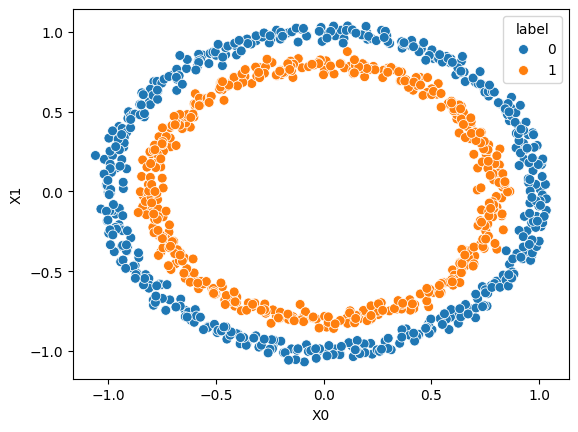

In [76]:
import seaborn as sns

sns.scatterplot(data=circles, x="X0", y="X1", hue="label", s=50)

In [77]:
x.shape,y.shape

((1000, 2), (1000,))

In [78]:
x[1],y[1]

(array([-0.75615888,  0.15325888]), 1)

In [79]:
import tensorflow as tf


simple_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

simple_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]

)

simple_model.fit(x,y,epochs=200,verbose=0)

In [80]:
simple_model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4617 - loss: 0.8071  


[0.7787864804267883, 0.49000000953674316]

In [81]:
simple_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

simple_model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]

)

simple_model_2.fit(x,y,epochs=100,verbose=0)

simple_model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5132 - loss: 0.6931


[0.693157434463501, 0.4909999966621399]

In [82]:
simple_model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


simple_model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

simple_model_3.fit(x,y,epochs=100,verbose=0)

simple_model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4960 - loss: 0.6918  


[0.6943116188049316, 0.47999998927116394]

In [83]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_bounary(model,x,y):

  x_min,x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  y_pred = np.round(y_pred)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


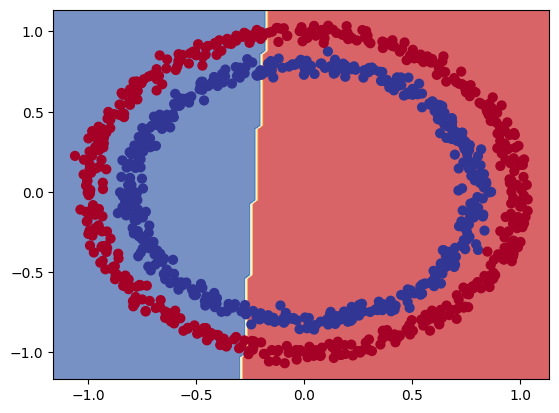

In [84]:
plot_decision_bounary((simple_model),x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


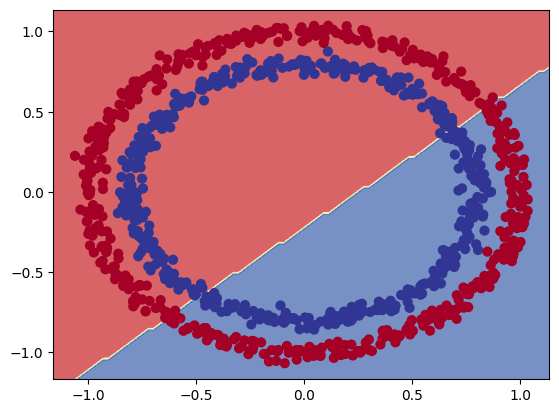

In [85]:
plot_decision_bounary(simple_model_2,x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


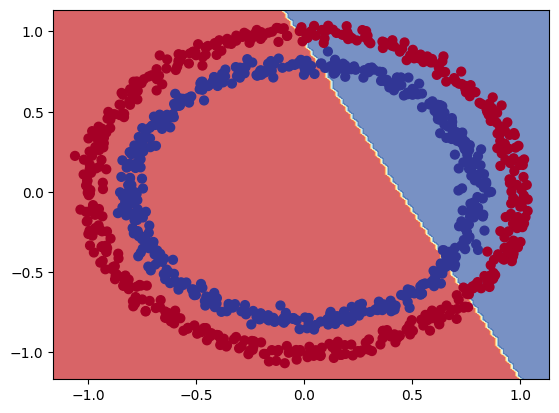

In [86]:
plot_decision_bounary(simple_model_3,x,y)

In [87]:
simple_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(1,"sigmoid")

])

simple_model_4.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]

)

simple_model_4.fit(x,y,epochs=100,verbose=0)

simple_model_4.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0171  


[0.02165403962135315, 0.9940000176429749]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


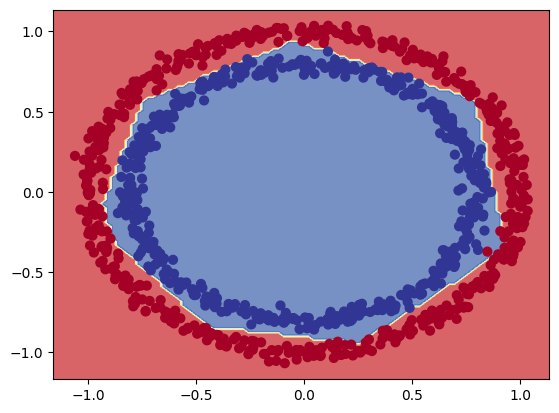

In [88]:
plot_decision_bounary(simple_model_4,x,y)

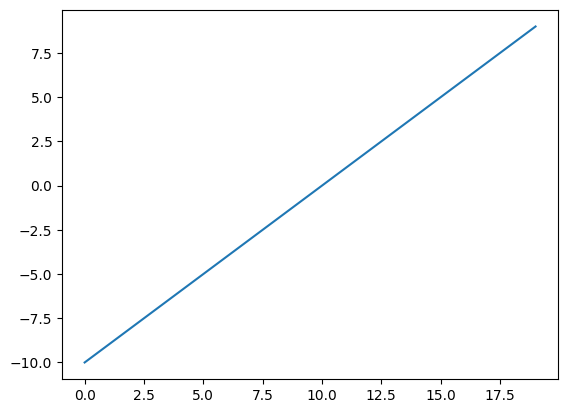

In [89]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A
plt.plot(A)

In [90]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

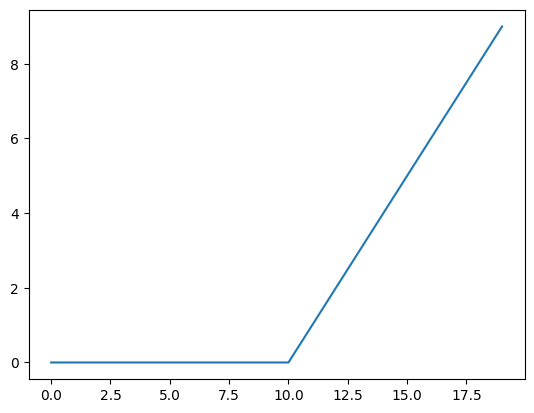

In [91]:
plt.plot(relu(A))

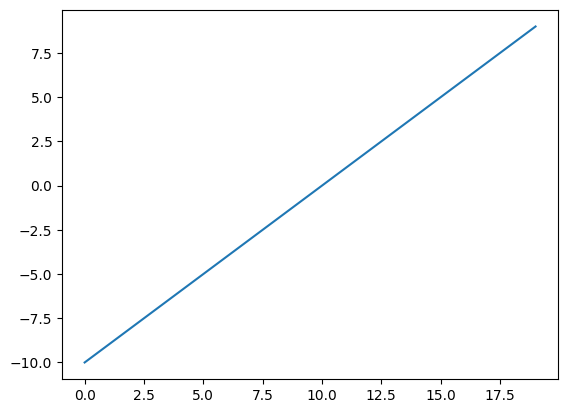

In [92]:
plt.plot(tf.keras.activations.linear(A));

In [93]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [94]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
tf.random.set_seed(42)

simple_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(1,"sigmoid")

])
simple_model_5.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]

)
history = simple_model_5.fit(x_train,y_train,epochs=25,verbose=1)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5113 - loss: 0.6923
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 0.6856 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5363 - loss: 0.6818  
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 0.6777 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 0.6736 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 0.6684  
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 0.6621  
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 0.6514
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.6214 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6923 - loss: 0.5879 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.5443 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [96]:
simple_model_5.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.1678  


[0.16905269026756287, 0.9599999785423279]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


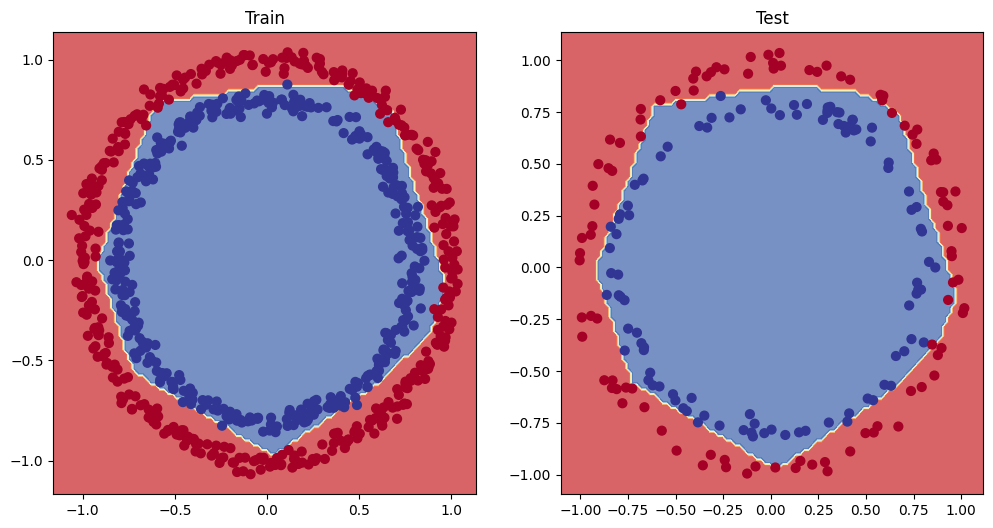

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_bounary(simple_model_5, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_bounary(simple_model_5, x=x_test, y=y_test)
plt.show()

In [98]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.50750,0.691912
1,0.52625,0.686348
2,0.53625,0.683118
3,0.54750,0.679715
4,0.55750,0.675559
5,0.56250,0.670617
6,0.58250,0.664107
7,0.61625,0.650761
8,0.66625,0.617938
9,0.70000,0.583419


Text(0.5, 0, 'epochs')

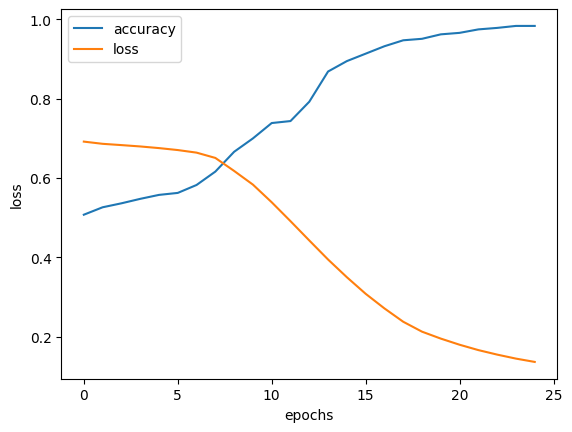

In [99]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [100]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


model_6.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

history = model_6.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5034 - loss: 0.6913 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.6909 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5098 - loss: 0.6905 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 0.6901 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6897 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 0.6892 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.6887 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 0.6883 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 0.6878 - learning_

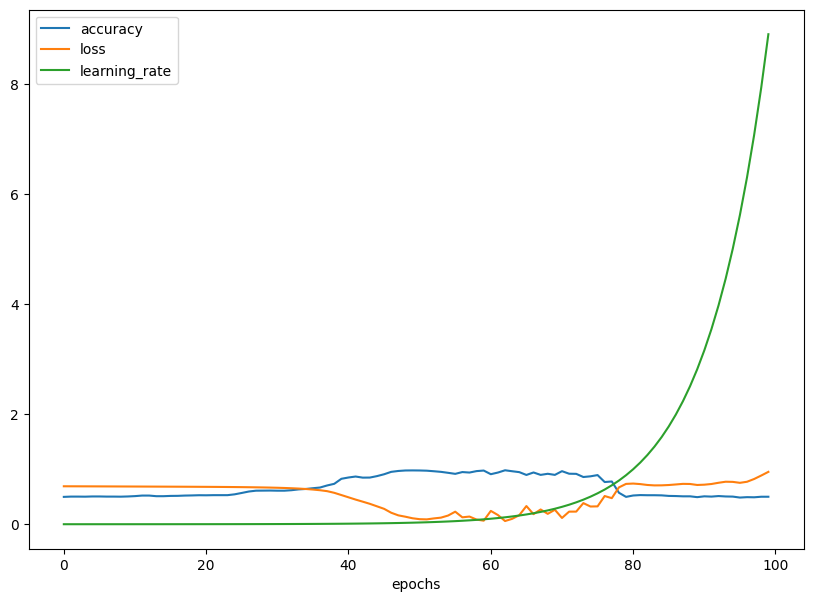

In [101]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

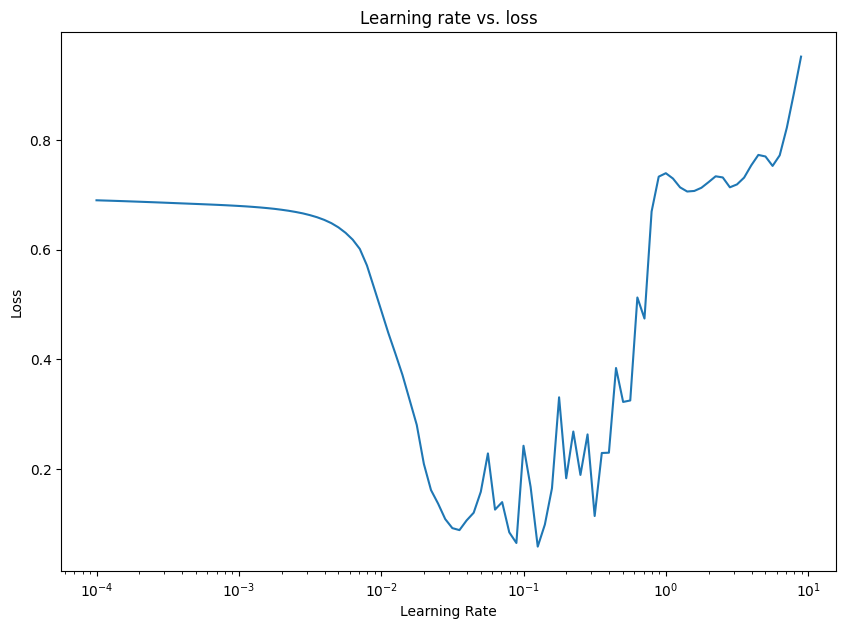

In [102]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [108]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_7.compile(
    loss='binary_crossentropy',
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)



history_7 = model_7.fit(x_train,y_train,epochs=25,verbose=1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4607 - loss: 0.6958
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4895 - loss: 0.6925 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5111 - loss: 0.6908 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 0.6892  
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5051 - loss: 0.6870 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 0.6838 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5227 - loss: 0.6786  
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5332 - loss: 0.6711  
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5486 - loss: 0.6567 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6237 - loss: 0.6236 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7612 - loss: 0.5690 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [109]:
model_7.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.1238  


[0.13255229592323303, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


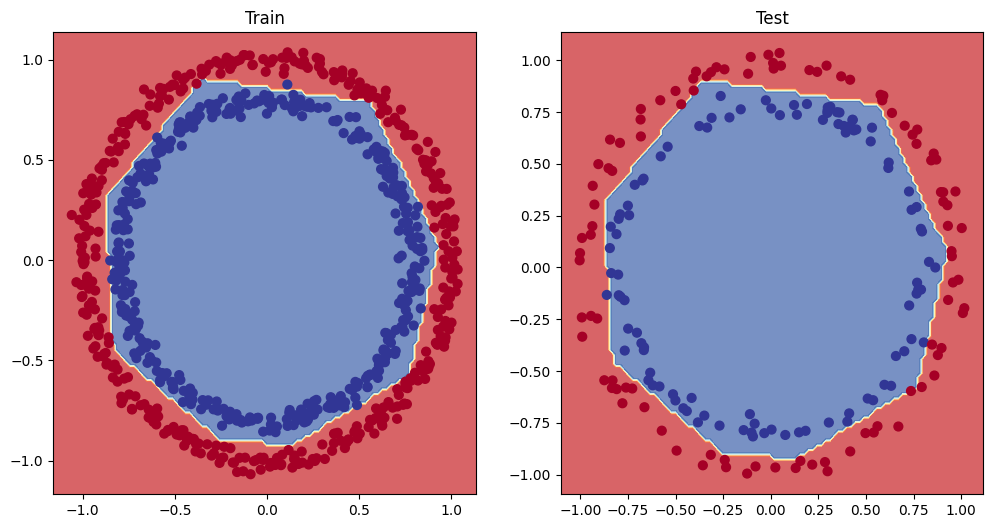

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_bounary(model_7, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_bounary(model_7, x=x_test, y=y_test)
plt.show()

In [111]:
loss,accuracy = model_7.evaluate(x_test,y_test)

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.1238 
Model Loss: 0.13255229592323303
Model Accuracy: 99.50000047683716%


In [114]:
y_pred_7 = model_7.predict(x_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [117]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,tf.round(y_pred_7)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



<Axes: >

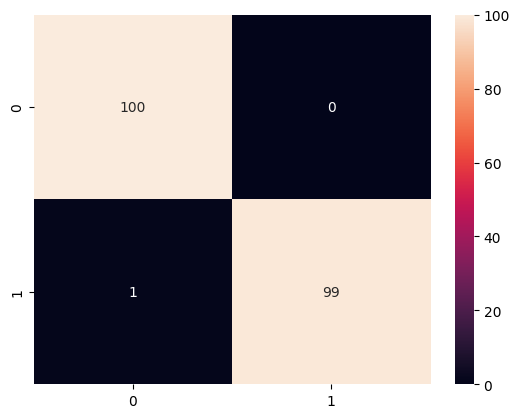

In [121]:
import seaborn as sns

confusion_matrix = confusion_matrix(y_test,tf.round(y_pred_7))
sns.heatmap(confusion_matrix,annot=True,fmt="d")